# Naive Bayes for Flower Recognition
In this assignment, you will be asked to implement Gaussian Naive Bayes by yourself (sci-kit learn is not allowed) and use it classify what kind of iris flower the sample is given its features listed below:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

There are three kinds of flowers: Iris Setosa, Iris Versicolour and Iris Virginica.
The data we get comes from [Kaggle: Iris Dataset Visualization and Machine Learning](https://www.kaggle.com/xuhewen/iris-dataset-visualization-and-machine-learning). Make sure you have installed pandas, numpy and seaborn before running the script.
```bash
    conda install pandas numpy seaborn
```
or

```bash
    pip3 install pandas numpy seaborn
```
The following code loads the data and the dataset looks like the following:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
iris = pd.read_csv('iris_data.txt', header=None) #read dataset
iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'] # rename each column
iris_visual = shuffle(iris, random_state = 0) # shuffle the dataset
iris_visual.head(10) #print the top ten entries

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
114            5.8           2.8            5.1           2.4   Iris-virginica
62             6.0           2.2            4.0           1.0  Iris-versicolor
33             5.5           4.2            1.4           0.2      Iris-setosa
107            7.3           2.9            6.3           1.8   Iris-virginica
7              5.0           3.4            1.5           0.2      Iris-setosa
100            6.3           3.3            6.0           2.5   Iris-virginica
40             5.0           3.5            1.3           0.3      Iris-setosa
86             6.7           3.1            4.7           1.5  Iris-versicolor
76             6.8           2.8            4.8           1.4  Iris-versicolor
71             6.1           2.8            4.0           1.3  Iris-versicolor

In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Visualization of the dataset.
The following code visualize the distribution of each pair of the features within each class. (Diagnals are probability density function for each feature).

C:\Users\qyzen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


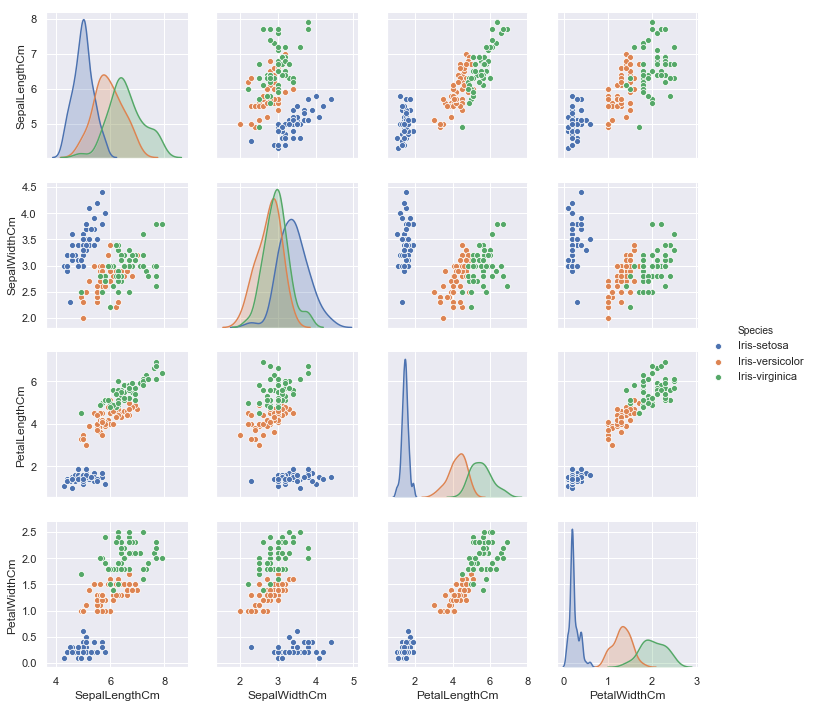

In [3]:
import seaborn as sns
sns.set()
sns.pairplot(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],
             hue="Species", diag_kind="kde")

## Data splitting
Next, we split the data into training and testing sets according to 60/40 rule. 

In [4]:
from sklearn.model_selection import train_test_split
iris_data = np.array(iris)
X_trn, X_tst, y_trn, y_tst = train_test_split(iris_data[:,0:4], iris_data[:,4], test_size = 0.4, random_state = 0) # split the dataset into training and testing sets

# Problem 1 Write your own Gaussian Naive Bayes code
Using the skeleton provided below, write your own code for learning and inference using Gaussian Naive Bayes model. You can use the skeleton provided in the second problem to verify whether you are writing it correctly. Reading through chapter 1.9.1 in the following link and the slide from last year can be useful:
https://scikit-learn.org/stable/modules/naive_bayes.html

https://www.dropbox.com/s/6d5h6fig1fj44e4/Naive_Bayes.pdf?dl=0

In [5]:
def gnb_train(X, y, output_label):
    output_size = len(output_label)
    prior = np.zeros(output_size)
    mean = np.zeros((output_size, X.shape[1]))
    std = np.zeros((output_size, X.shape[1]))
# ======= Your Code Here =======

#===================calculate prior====================
    versicolor = 0
    virginica = 0
    setosa = 0
    
    for i in range(len(X)):
        if y[i] == 'Iris-virginica':
            virginica +=1
        elif y[i]=='Iris-versicolor':
            versicolor +=1
        elif y[i]=='Iris-setosa':
            setosa +=1
            
    prior[1] = virginica/len(X)
    prior[0] = versicolor/len(X)
    prior[2] = setosa/len(X)
#===================calculate mean====================  
    countver = 0
    countvir = 0
    countset = 0
    m=np.zeros((output_size,X.shape[1]))
    
    for i in range (len(X)):
        if y[i]== 'Iris-versicolor':
            countver+=1
            for j in range ( X.shape[1]):
                m[0][j] = m[0][j]+X[i][j]
    
        elif y[i] == 'Iris-virginica':
            countvir+=1
            for j in range ( X.shape[1]):
                m[1][j] = m[1][j]+X[i][j]
            
        elif y[i] == 'Iris-setosa':
            countset+=1
            for j in range ( X.shape[1]):
                m[2][j] = m[2][j]+X[i][j]
    
    for k in range (X.shape[1]):
        mean[0][k]= m[0][k]/countver
    for k in range (X.shape[1]):
        mean[1][k]= m[1][k]/countvir
    for k in range (X.shape[1]):
        mean[2][k]= m[2][k]/countset
#===================calculate std====================  
    iver = 0
    ivir = 0
    iset = 0
    a=np.zeros((output_size,X.shape[1]))
    
    for i in range (len(X)):
        if y[i]== 'Iris-versicolor':
            iver+=1
            for j in range ( X.shape[1]):
                a[0][j] = a[0][j]+np.power(X[i][j]-mean[0][j],2)
           
        elif y[i] == 'Iris-virginica':
            ivir+=1
            for j in range ( X.shape[1]):
                a[1][j] = a[1][j]+np.power(X[i][j]-mean[1][j],2)
            
        elif y[i] == 'Iris-setosa':
            iset+=1
            for j in range ( X.shape[1]):
                a[2][j] = a[2][j]+np.power(X[i][j]-mean[2][j],2)
            
    for i in range (X.shape[1]):
        std[0][i]= np.sqrt(a[0][i]/iver)
    for i in range (X.shape[1]):
        std[1][i]= np.sqrt(a[1][i]/ivir)
    for i in range (X.shape[1]):
        std[2][i]= np.sqrt(a[2][i]/iset)  

    return prior, mean, std

def gnb_predict(X, prior, mean, std, output_label):
    predict = []
# ======= Your Code Here =======
    import math  
    
    ClassProb_ver =1
    ClassProb_vir =1
    ClassProb_set =1
    
    def calculate(x, mean, stdev):
        a = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
        return (1 / (math.sqrt(2*math.pi) * stdev)) * a
    
    for k in range(len(X)):
        ClassProb_ver =1
        ClassProb_vir =1
        ClassProb_set =1
        for i in range (X.shape[1]):
            ClassProb_ver *= calculate(X[k][i], mean[0][i], std[0][i])
            ClassProb_vir *= calculate(X[k][i], mean[1][i], std[1][i])
            ClassProb_set *= calculate(X[k][i], mean[2][i], std[2][i])

        ClassProb_ver *= prior[0]
        ClassProb_vir *= prior[1]
        ClassProb_set *= prior[2]

        if ClassProb_ver >= ClassProb_vir and ClassProb_ver>= ClassProb_set:
            predict.append ( "Iris-versicolor")
        elif ClassProb_vir >= ClassProb_ver and ClassProb_vir>= ClassProb_set:
            predict.append( "Iris-virginica")
        elif ClassProb_set >= ClassProb_vir and ClassProb_set>= ClassProb_ver:
            predict.append("Iris-setosa")

    return predict


# Problem 2: Inference on IRIS dataset
Using your own GNB functions, implementing Gaussian Naive Bayes algorithm for the first feature, the first two features, the first three features and the first four features. Output the error for each experiment and explain using the visualization of the dataset.

In [6]:
from sklearn.metrics import hamming_loss
output_label = list(set(y_trn))
for i in range(1,5):
    prior, mean, std = gnb_train(X_trn[:,0:i], y_trn, output_label)
    y_pred = gnb_predict(X_tst[:,0:i], prior, mean, std, output_label)
    error = hamming_loss(y_tst, y_pred)
    print("Test error using first", i, "features:",  error)

Test error using first 1 features: 0.36666666666666664
Test error using first 2 features: 0.31666666666666665
Test error using first 3 features: 0.18333333333333332
Test error using first 4 features: 0.06666666666666667


The more feature we use, the less test error, the better performance. Because when we have less features, there are some data points, which belong to different species, would overlap in the graph, so we cannot seperate them. If we have one more feature, this additional feature might able to seperate these data points. Therefore we could have less error with more features.

### Problem 3: The Limitation of Naive Bayes
From the last feature, we can see the more features we use, we will get better performance. In this question, we show sometimes it is not the case. Repeat the first feature for $i = 1, 2, 3, ...., 300$ times and plot the testing error. Justify the plot. If we repeat the first
feature for infinitely many number of times, will the test accuracy become zero? If yes, explain why and if not, what would be your guess for the final error?

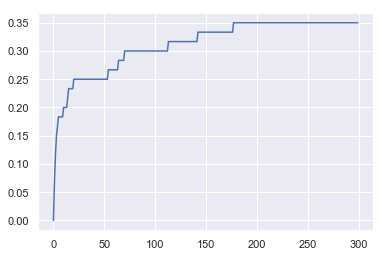

In [7]:
err = np.zeros(300)
for i in range(1,300):
    X_trn_new = np.hstack((X_trn, np.tile(X_trn[:, [0]], i)))
    X_tst_new = np.hstack((X_tst, np.tile(X_tst[:, [0]], i)))
    prior, mean, std = gnb_train(X_trn_new, y_trn, output_label)
    y_pred = gnb_predict(X_tst_new, prior, mean, std, output_label)
    err[i] = hamming_loss(y_tst, y_pred)
plt.plot(err)

According to the graph, the testing error increased when we increase the number of times the first feature repeates, but the increasing rate decreases. If we repeat the first feature for infinitely many number of times, the test accuracy will not become zero. My guess for the final error is 0.36. Because in problem 2 when we have only 1 feature, the test error is 0.36, so I'm guessing that the test error in using this feature several times cannot be worse than 0.36. 